In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv("wafer.csv")
df.shape

(100, 592)

# Dropping Unnamed columns as its not necessary

In [13]:
#Dropping Unnamed columns as its not necessary
df.drop(['Unnamed: 0'], axis =1 , inplace = True)

# Looking for duplicate values

In [38]:
df.duplicated().sum()  
# No duplicate values

0

# Finding the percenatge of null values for each coloumns

In [17]:
(df.isnull().mean())*100

Sensor-1       1.0
Sensor-2       0.0
Sensor-3       3.0
Sensor-4       3.0
Sensor-5       3.0
Sensor-6       3.0
Sensor-7       3.0
Sensor-8       3.0
Sensor-9       0.0
Sensor-10      0.0
Sensor-11      0.0
Sensor-12      0.0
Sensor-13      0.0
Sensor-14      0.0
Sensor-15      0.0
Sensor-16      0.0
Sensor-17      0.0
Sensor-18      0.0
Sensor-19      0.0
Sensor-20      0.0
Sensor-21      0.0
Sensor-22      0.0
Sensor-23      0.0
Sensor-24      0.0
Sensor-25      0.0
Sensor-26      0.0
Sensor-27      0.0
Sensor-28      0.0
Sensor-29      0.0
Sensor-30      0.0
Sensor-31      0.0
Sensor-32      0.0
Sensor-33      0.0
Sensor-34      0.0
Sensor-35      0.0
Sensor-36      0.0
Sensor-37      0.0
Sensor-38      0.0
Sensor-39      0.0
Sensor-40      0.0
Sensor-41      2.0
Sensor-42      2.0
Sensor-43      0.0
Sensor-44      0.0
Sensor-45      0.0
Sensor-46      0.0
Sensor-47      0.0
Sensor-48      0.0
Sensor-49      0.0
Sensor-50      0.0
Sensor-51      0.0
Sensor-52      0.0
Sensor-53   

In [19]:
'''

cols = []
for col in df.columns:
    if (df[col].isnull().sum()) > 35:
        df.drop([col], axis = 1 , inplace = True)
        cols.append(col)
len(cols)
df.shape 

'''

'\n\ncols = []\nfor col in df.columns:\n    if (df[col].isnull().sum()) > 35:\n        df.drop([col], axis = 1 , inplace = True)\n        cols.append(col)\nlen(cols)\ndf.shape \n\n'

# Filling null values

In [21]:
for col in df.columns:
    df[col] = df[col].fillna(df[col].median())

In [50]:
df.isnull().sum().sum()  # No null values

0

# Check for class Imbalance

In [55]:
df['Good/Bad'].value_counts(),df['Good/Bad'].isna().sum() #Imbalnced class

(Good/Bad
 -1    94
  1     6
 Name: count, dtype: int64,
 0)

# Split x and y

In [229]:
# Divide x and y
x = df.drop(["Good/Bad"], axis = 1)
y = df['Good/Bad']

In [231]:
x.shape, y.shape

((100, 590), (100,))

# Train test and split

In [233]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state=1)

In [235]:
x_train.shape,x_test.shape,y_train.value_counts(),y_test.value_counts(),y_train.shape

((70, 590),
 (30, 590),
 Good/Bad
 -1    66
  1     4
 Name: count, dtype: int64,
 Good/Bad
 -1    28
  1     2
 Name: count, dtype: int64,
 (70,))

# Using sampling technique to balance the class

In [237]:
from imblearn.over_sampling import ADASYN
adasys = ADASYN(sampling_strategy={-1: 100, 1: 60}, random_state=42,n_neighbors=3)
x_train, y_train = adasys.fit_resample(x_train, y_train)

In [239]:
((y_train == 1).sum().sum()), ((y_train == -1).sum().sum())

(60, 96)

# Scaling the data

In [241]:
from sklearn.preprocessing import RobustScaler
RobustScaler_1 = RobustScaler()

In [243]:
x_train = RobustScaler_1.fit_transform(x_train)
x_test = RobustScaler_1.transform(x_test)

In [247]:
x_train.shape,y_train.shape

((156, 590), (156,))

# Model training

In [107]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score

In [111]:
models = { "LR" : LogisticRegressionCV(),
          "SVC" : SVC(kernel='linear'),
          "LSVC" : LinearSVC(),
          "RFC" : RandomForestClassifier(),
          "ABC" : AdaBoostClassifier(),
          "GBC" : GradientBoostingClassifier(),
          "DTC" : DecisionTreeClassifier(),
          "GNB" : GaussianNB()
         }

In [121]:
kf = KFold(n_splits = 4, shuffle=True, random_state=1)  # Using Kfold CV

Scores [100.         100.          97.43589744  97.43589744]
Mean Score 0.9871794871794872
              precision    recall  f1-score   support

          -1       0.93      0.96      0.95        28
           1       0.00      0.00      0.00         2

    accuracy                           0.90        30
   macro avg       0.47      0.48      0.47        30
weighted avg       0.87      0.90      0.88        30

 fpr [0.         0.03571429 1.        ], tpr [0. 0. 1.], threshold [inf  1. -1.]
AUC Score 0.48214285714285715
Model Score 0.48214285714285715
Accuracy score of LogisticRegressionCV() is 48.214285714285715


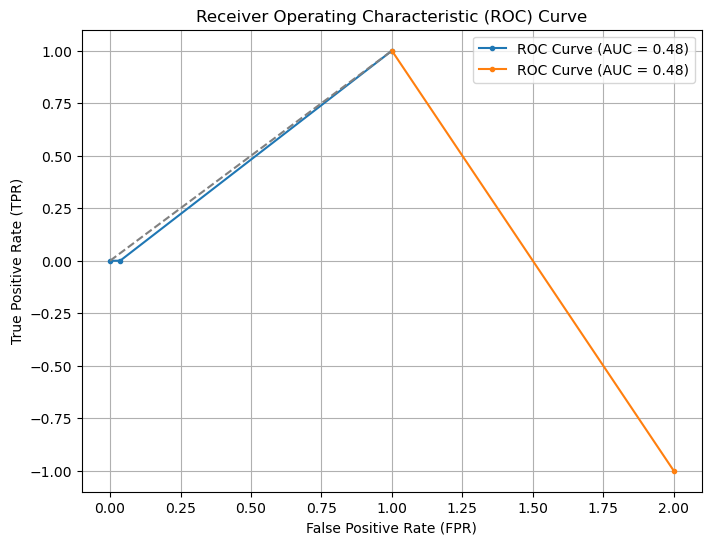

***********************************
Scores [100.         100.          97.43589744  97.43589744]
Mean Score 0.9871794871794872
              precision    recall  f1-score   support

          -1       0.93      0.89      0.91        28
           1       0.00      0.00      0.00         2

    accuracy                           0.83        30
   macro avg       0.46      0.45      0.45        30
weighted avg       0.86      0.83      0.85        30

 fpr [0.         0.10714286 1.        ], tpr [0. 0. 1.], threshold [inf  1. -1.]
AUC Score 0.44642857142857145
Model Score 0.44642857142857145
Accuracy score of SVC(kernel='linear') is 44.642857142857146


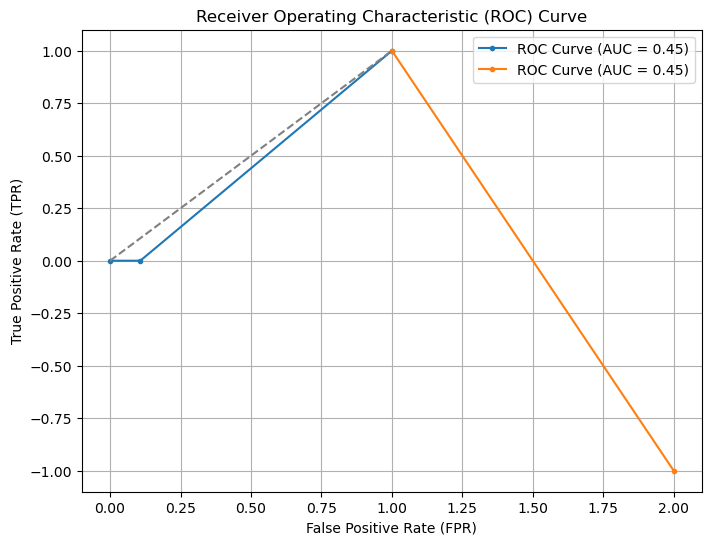

***********************************
Scores [100.         100.          97.43589744  97.43589744]
Mean Score 0.9871794871794872
              precision    recall  f1-score   support

          -1       0.93      0.93      0.93        28
           1       0.00      0.00      0.00         2

    accuracy                           0.87        30
   macro avg       0.46      0.46      0.46        30
weighted avg       0.87      0.87      0.87        30

 fpr [0.         0.07142857 1.        ], tpr [0. 0. 1.], threshold [inf  1. -1.]
AUC Score 0.4642857142857143
Model Score 0.4642857142857143
Accuracy score of LinearSVC() is 46.42857142857143


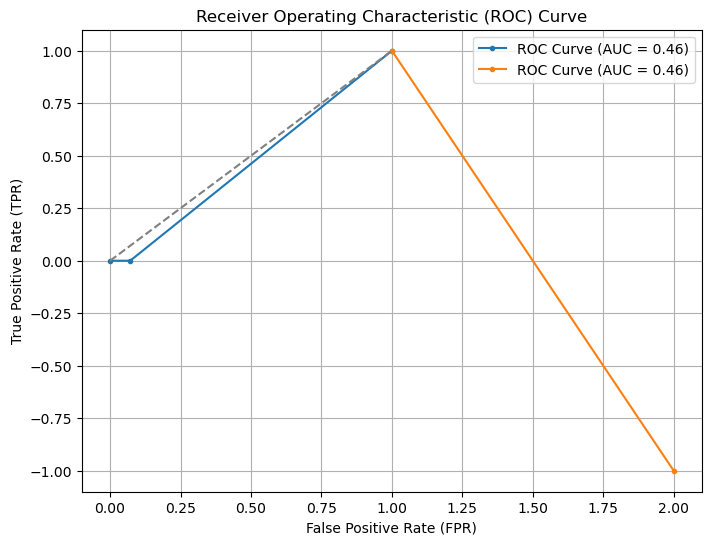

***********************************
Scores [100. 100. 100. 100.]
Mean Score 1.0
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97        28
           1       0.00      0.00      0.00         2

    accuracy                           0.93        30
   macro avg       0.47      0.50      0.48        30
weighted avg       0.87      0.93      0.90        30

 fpr [0. 1.], tpr [0. 1.], threshold [inf -1.]
AUC Score 0.5
Model Score 0.5
Accuracy score of RandomForestClassifier() is 50.0


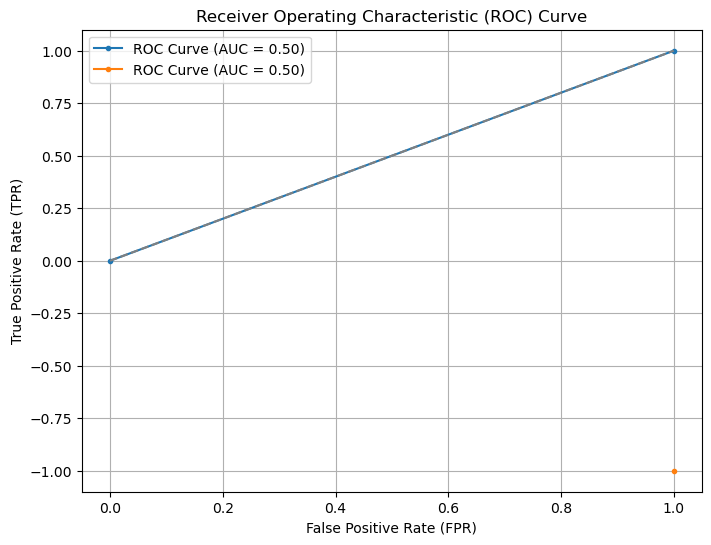

***********************************
Scores [100.         100.          94.87179487  97.43589744]
Mean Score 0.9807692307692308
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97        28
           1       0.00      0.00      0.00         2

    accuracy                           0.93        30
   macro avg       0.47      0.50      0.48        30
weighted avg       0.87      0.93      0.90        30

 fpr [0. 1.], tpr [0. 1.], threshold [inf -1.]
AUC Score 0.5
Model Score 0.5
Accuracy score of AdaBoostClassifier() is 50.0


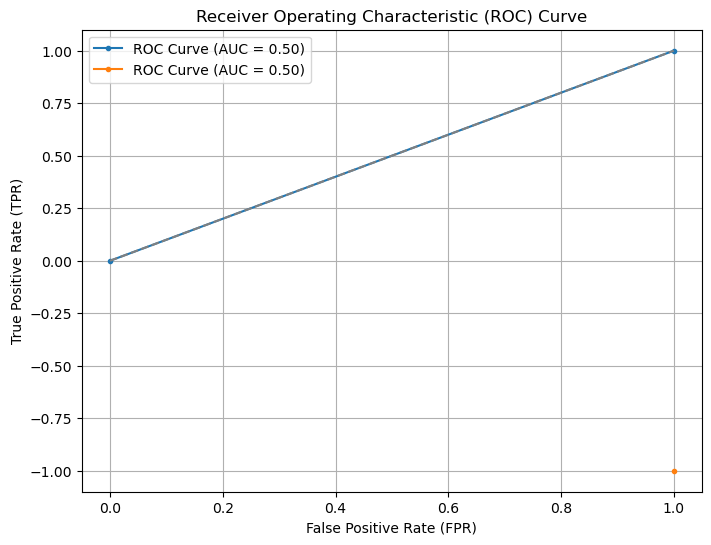

***********************************
Scores [ 92.30769231 100.          94.87179487  94.87179487]
Mean Score 0.9551282051282051
              precision    recall  f1-score   support

          -1       0.96      0.96      0.96        28
           1       0.50      0.50      0.50         2

    accuracy                           0.93        30
   macro avg       0.73      0.73      0.73        30
weighted avg       0.93      0.93      0.93        30

 fpr [0.         0.03571429 1.        ], tpr [0.  0.5 1. ], threshold [inf  1. -1.]
AUC Score 0.7321428571428571
Model Score 0.7321428571428571
Accuracy score of GradientBoostingClassifier() is 73.21428571428571


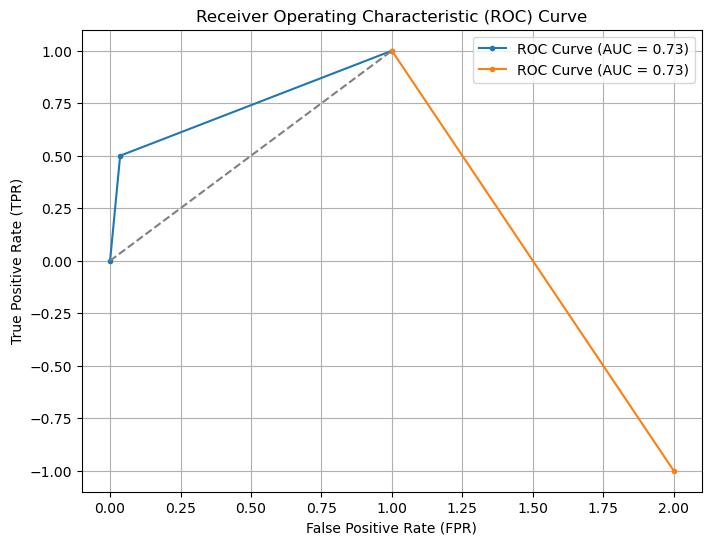

***********************************
Scores [ 97.43589744 100.          92.30769231  94.87179487]
Mean Score 0.9615384615384617
              precision    recall  f1-score   support

          -1       0.96      0.93      0.95        28
           1       0.33      0.50      0.40         2

    accuracy                           0.90        30
   macro avg       0.65      0.71      0.67        30
weighted avg       0.92      0.90      0.91        30

 fpr [0.         0.07142857 1.        ], tpr [0.  0.5 1. ], threshold [inf  1. -1.]
AUC Score 0.7142857142857143
Model Score 0.7142857142857143
Accuracy score of DecisionTreeClassifier() is 71.42857142857143


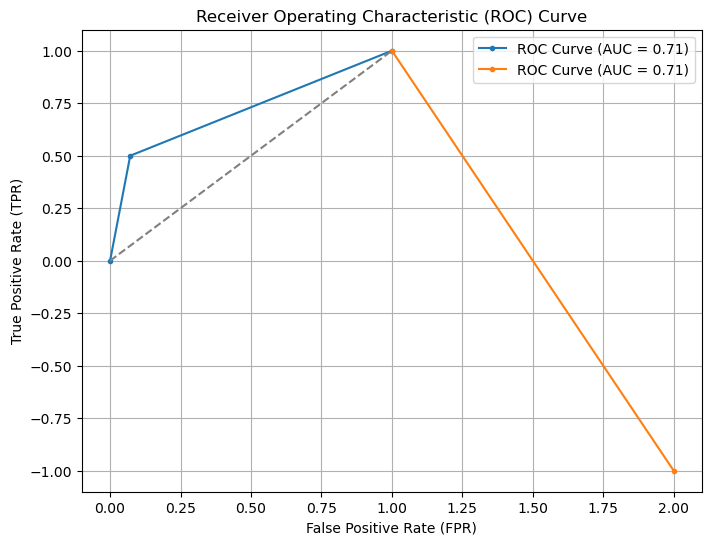

***********************************
Scores [100.         100.         100.          97.43589744]
Mean Score 0.9935897435897436
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97        28
           1       0.00      0.00      0.00         2

    accuracy                           0.93        30
   macro avg       0.47      0.50      0.48        30
weighted avg       0.87      0.93      0.90        30

 fpr [0. 1.], tpr [0. 1.], threshold [inf -1.]
AUC Score 0.5
Model Score 0.5
Accuracy score of GaussianNB() is 50.0


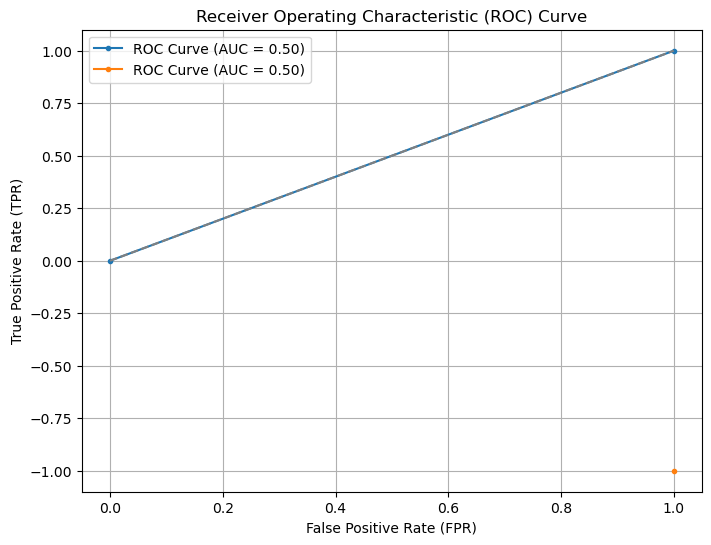

***********************************
Model with highest auc score  is -> 73.21428571428571. Model name is GBC


In [249]:
# from sklearn.metrics import roc_curve, roc_auc_score
model_list = []
report = []
for i in range(len(models)):
    model = (list(models.values())[i])
    scores = cross_val_score(model, x_train, y_train, cv = kf)
    print("Scores", scores * 100)
    print("Mean Score", np.mean(scores))
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    fpr, tpr, thresholds = roc_curve(y_test,y_pred)
    auc_score = roc_auc_score(y_test,y_pred)
    model_score = accuracy_score(y_test,y_pred)
    print(f" fpr {fpr}, tpr {tpr}, threshold {thresholds}")
    print("AUC Score", auc_score)
    print("Model Score", auc_score)
    print(f"Accuracy score of {model} is {auc_score * 100}")
    report.append(auc_score*100)
    model_list.append(list(models.keys())[i])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr,thresholds, marker='.', label=f'ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid()
    plt.show()
    print("*"*35)

print(f"Model with highest auc score  is -> {max(report)}. Model name is {model_list[report.index(max(sorted(report)))]}")

# Using PCA

In [161]:
from sklearn.decomposition import PCA

In [251]:
x_train.shape,y_train.shape

((156, 590), (156,))

# Applying PCA post sampling and scaling

In [253]:
pca = PCA(n_components = 0.95)  # Reduce to 2 componentsx_train.shape,x_test.shape,y_train.value_counts(),y_test.value_counts()
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [255]:

# Step 3: Check explained variance ratio
print("Explained explained variance: ", pca.explained_variance_ratio_)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative explained variance: ", cumulative_variance)

n_components = np.argmax(cumulative_variance >= 0.95) + 1
print("Number of components to retain 95% variance: ", n_components)

Explained explained variance:  [0.65127596 0.14735397 0.09523164 0.09101738]
Cumulative explained variance:  [0.65127596 0.79862993 0.89386157 0.98487896]
Number of components to retain 95% variance:  4


In [257]:
# Step 4: View transformed data
x_train_pca = pd.DataFrame(x_train_pca, columns=['PC1', 'PC2',"PC3","PC4"])
x_train_pca.head()

,PC1,PC2,PC3,PC4
0,727.067676,7.520956,-6.151686,11.026173
1,-91.522408,-11.781697,8.717890,-19.409162
2,707.690123,7.205611,-3.011067,8.262433
3,-109.678352,-36.402844,610.840278,779.051734
4,-91.152911,-11.797517,11.636127,-21.976260


In [259]:
models_1 = { "LR" : LogisticRegressionCV(),
          "SVC" : SVC(kernel='linear'),
          "LSVC" : LinearSVC(),
          "RFC" : RandomForestClassifier(),
          "ABC" : AdaBoostClassifier(),
          "GBC" : GradientBoostingClassifier(),
          "DTC" : DecisionTreeClassifier(),
          "GNB" : GaussianNB()
         }

Scores [74.35897436 89.74358974 89.74358974 87.17948718]
Mean Score 0.8525641025641025
              precision    recall  f1-score   support

          -1       0.95      0.68      0.79        28
           1       0.10      0.50      0.17         2

    accuracy                           0.67        30
   macro avg       0.53      0.59      0.48        30
weighted avg       0.89      0.67      0.75        30

 fpr [0.         0.32142857 1.        ], tpr [0.  0.5 1. ], threshold [inf  1. -1.]
AUC Score 0.5892857142857143
Model Score 0.5892857142857143
Accuracy score of LogisticRegressionCV() is 58.92857142857143


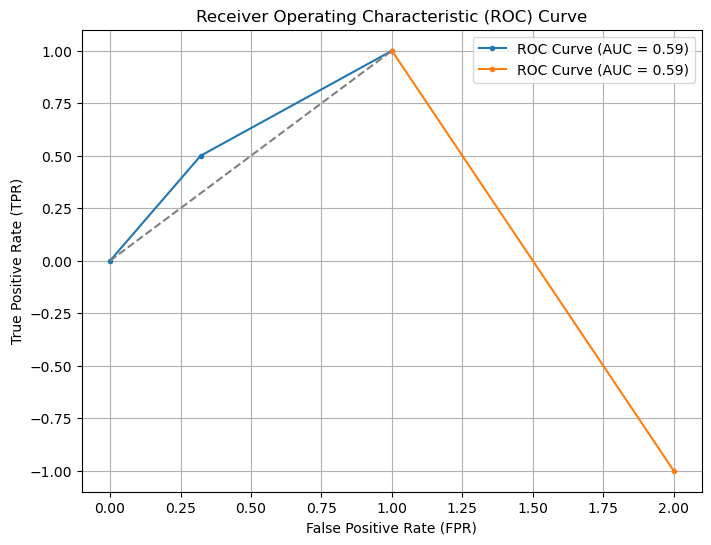

***********************************
Scores [82.05128205 84.61538462 87.17948718 84.61538462]
Mean Score 0.8461538461538461
              precision    recall  f1-score   support

          -1       1.00      0.75      0.86        28
           1       0.22      1.00      0.36         2

    accuracy                           0.77        30
   macro avg       0.61      0.88      0.61        30
weighted avg       0.95      0.77      0.82        30

 fpr [0.   0.25 1.  ], tpr [0. 1. 1.], threshold [inf  1. -1.]
AUC Score 0.875
Model Score 0.875
Accuracy score of SVC(kernel='linear') is 87.5


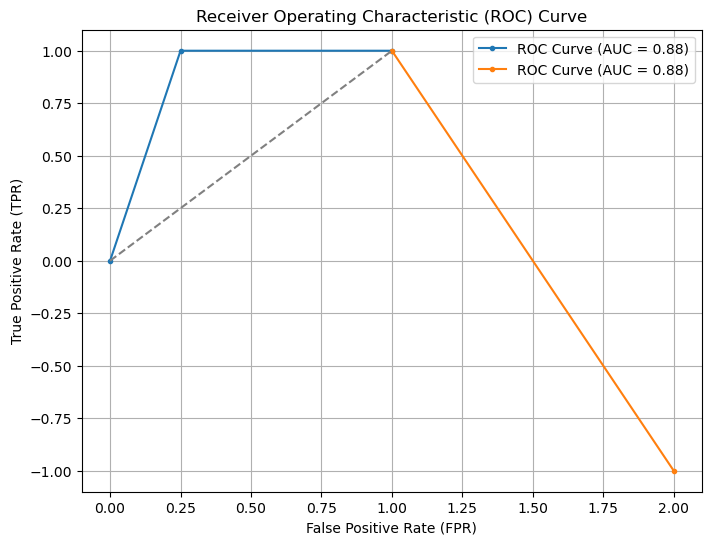

***********************************
Scores [56.41025641 51.28205128 58.97435897 64.1025641 ]
Mean Score 0.5769230769230769
              precision    recall  f1-score   support

          -1       1.00      0.39      0.56        28
           1       0.11      1.00      0.19         2

    accuracy                           0.43        30
   macro avg       0.55      0.70      0.38        30
weighted avg       0.94      0.43      0.54        30

 fpr [0.         0.60714286 1.        ], tpr [0. 1. 1.], threshold [inf  1. -1.]
AUC Score 0.6964285714285714
Model Score 0.6964285714285714
Accuracy score of LinearSVC() is 69.64285714285714


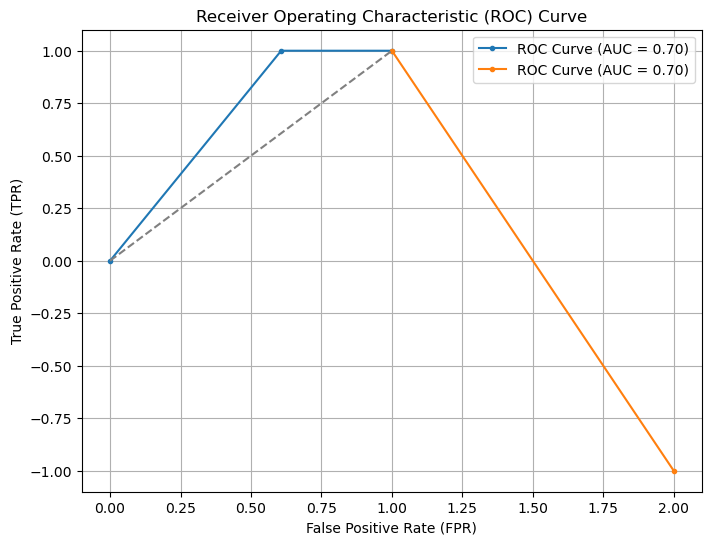

***********************************
Scores [100.         100.          97.43589744  94.87179487]
Mean Score 0.9807692307692308
              precision    recall  f1-score   support

          -1       0.97      1.00      0.98        28
           1       1.00      0.50      0.67         2

    accuracy                           0.97        30
   macro avg       0.98      0.75      0.82        30
weighted avg       0.97      0.97      0.96        30

 fpr [0. 0. 1.], tpr [0.  0.5 1. ], threshold [inf  1. -1.]
AUC Score 0.75
Model Score 0.75
Accuracy score of RandomForestClassifier() is 75.0


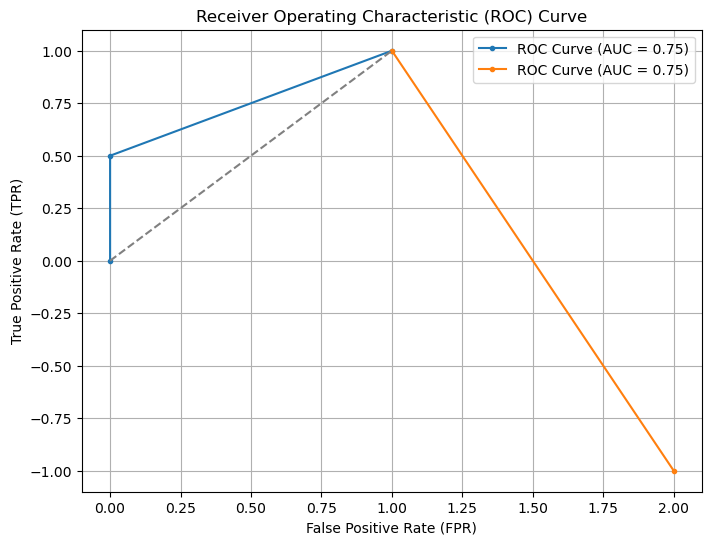

***********************************
Scores [100.         100.          97.43589744  94.87179487]
Mean Score 0.9807692307692308
              precision    recall  f1-score   support

          -1       0.97      1.00      0.98        28
           1       1.00      0.50      0.67         2

    accuracy                           0.97        30
   macro avg       0.98      0.75      0.82        30
weighted avg       0.97      0.97      0.96        30

 fpr [0. 0. 1.], tpr [0.  0.5 1. ], threshold [inf  1. -1.]
AUC Score 0.75
Model Score 0.75
Accuracy score of AdaBoostClassifier() is 75.0


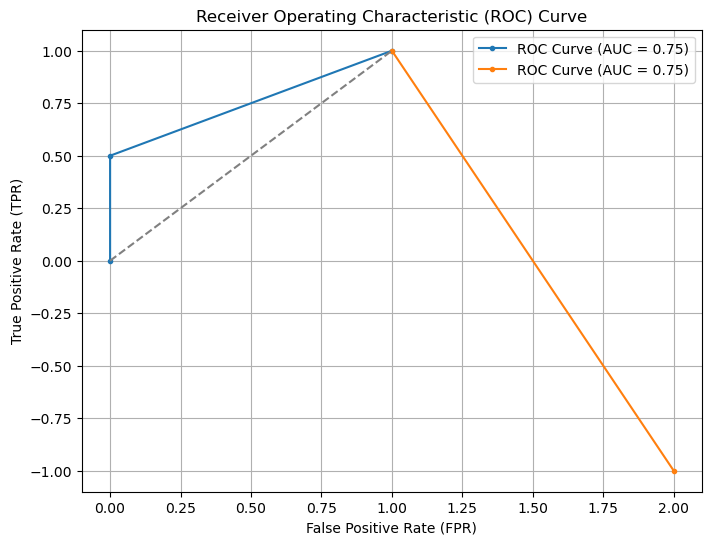

***********************************
Scores [ 94.87179487 100.          97.43589744  94.87179487]
Mean Score 0.9679487179487178
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97        28
           1       0.00      0.00      0.00         2

    accuracy                           0.93        30
   macro avg       0.47      0.50      0.48        30
weighted avg       0.87      0.93      0.90        30

 fpr [0. 1.], tpr [0. 1.], threshold [inf -1.]
AUC Score 0.5
Model Score 0.5
Accuracy score of GradientBoostingClassifier() is 50.0


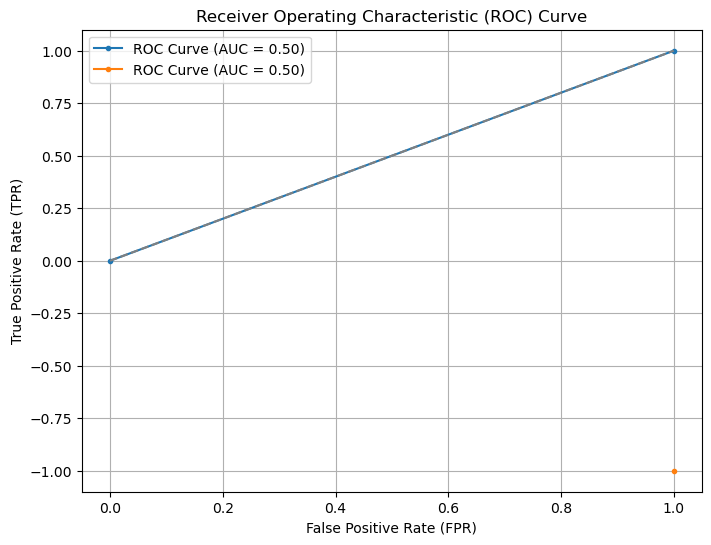

***********************************
Scores [ 94.87179487 100.          97.43589744  94.87179487]
Mean Score 0.9679487179487178
              precision    recall  f1-score   support

          -1       0.97      1.00      0.98        28
           1       1.00      0.50      0.67         2

    accuracy                           0.97        30
   macro avg       0.98      0.75      0.82        30
weighted avg       0.97      0.97      0.96        30

 fpr [0. 0. 1.], tpr [0.  0.5 1. ], threshold [inf  1. -1.]
AUC Score 0.75
Model Score 0.75
Accuracy score of DecisionTreeClassifier() is 75.0


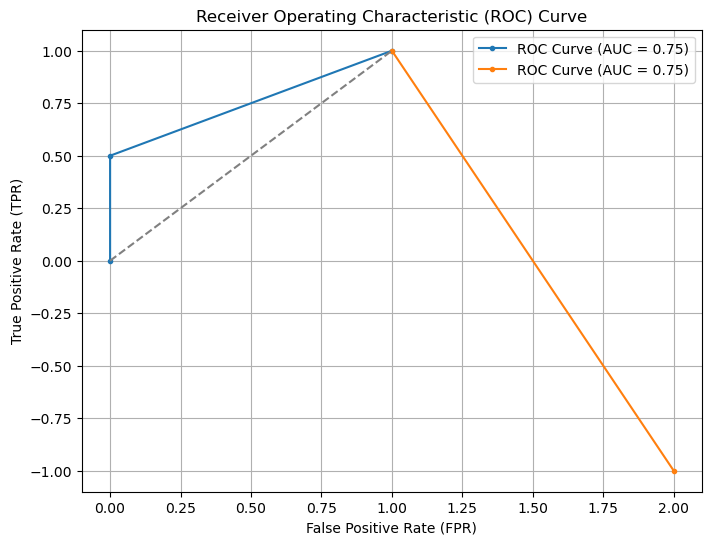

***********************************
Scores [84.61538462 84.61538462 82.05128205 92.30769231]
Mean Score 0.858974358974359
              precision    recall  f1-score   support

          -1       1.00      0.75      0.86        28
           1       0.22      1.00      0.36         2

    accuracy                           0.77        30
   macro avg       0.61      0.88      0.61        30
weighted avg       0.95      0.77      0.82        30

 fpr [0.   0.25 1.  ], tpr [0. 1. 1.], threshold [inf  1. -1.]
AUC Score 0.875
Model Score 0.875
Accuracy score of GaussianNB() is 87.5


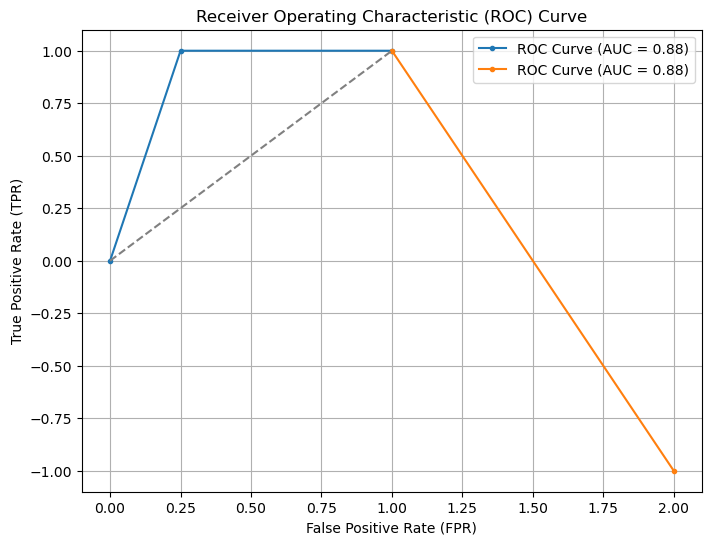

***********************************
Model with highest auc score  is -> 87.5. Model name is SVC


In [261]:
model_list = []
report = []
for i in range(len(models_1)):
    model = (list(models.values())[i])
    scores = cross_val_score(model, x_train_pca, y_train, cv = kf)
    print("Scores", scores * 100)
    print("Mean Score", np.mean(scores))
    model.fit(x_train_pca,y_train)
    y_pred = model.predict(x_test_pca)
    print(classification_report(y_test,y_pred))
    fpr, tpr, thresholds = roc_curve(y_test,y_pred)
    auc_score = roc_auc_score(y_test,y_pred)
    model_score = accuracy_score(y_test,y_pred)
    print(f" fpr {fpr}, tpr {tpr}, threshold {thresholds}")
    print("AUC Score", auc_score)
    print("Model Score", auc_score)
    print(f"Accuracy score of {model} is {auc_score * 100}")
    report.append(auc_score*100)
    model_list.append(list(models_1.keys())[i])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr,thresholds, marker='.', label=f'ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid()
    plt.show()
    print("*"*35)

print(f"Model with highest auc score  is -> {max(report)}. Model name is {model_list[report.index(max(sorted(report)))]}")